## Import libraries

In [1]:
import os
import pandas as pd
from google.colab import drive

## Configure Project Path and other paths

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
proj_path = '/content/drive/MyDrive/Magnimind/Face_detection/MP'
os.chdir(proj_path)

In [4]:
train_csv_path = os.path.join(proj_path, 'train_3D.csv')
test_csv_path = os.path.join(proj_path, 'test_3D.csv')

## Read data from csv to pandas dataframe

In [5]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [6]:
train_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,839,Autistic,0.511593,0.709910,-0.040127,0.517181,0.670308,-0.168715,0.515403,...,-0.057532,0.587559,0.500262,-0.077599,0.768636,0.474503,-0.021161,0.784336,0.468965,-0.021392
1,/content/drive/MyDrive/Magnimind/Face_detectio...,825,Autistic,0.566339,0.733220,-0.065258,0.575596,0.677747,-0.127426,0.568713,...,0.001300,0.609449,0.556148,-0.015839,0.738344,0.541875,0.039996,0.751471,0.531839,0.042270
2,/content/drive/MyDrive/Magnimind/Face_detectio...,817,Autistic,0.437217,0.744490,-0.077209,0.426740,0.685478,-0.165941,0.433244,...,-0.018598,0.488665,0.551752,-0.038808,0.656447,0.535078,0.003090,0.674554,0.525373,0.003349
3,/content/drive/MyDrive/Magnimind/Face_detectio...,845,Autistic,0.533727,0.797597,-0.053682,0.549781,0.762331,-0.169223,0.540980,...,-0.035548,0.601406,0.623819,-0.057016,0.766676,0.603243,0.013871,0.782729,0.596054,0.015662
4,/content/drive/MyDrive/Magnimind/Face_detectio...,844,Autistic,0.524054,0.774706,-0.052582,0.505436,0.710976,-0.152662,0.512779,...,-0.039194,0.528307,0.568924,-0.058087,0.683886,0.525732,-0.016595,0.697740,0.517121,-0.017281


In [7]:
test_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,100,Autistic,0.727391,0.710138,-0.117875,0.753489,0.581854,-0.193980,0.723864,...,0.048919,0.737665,0.421433,0.016144,0.890724,0.401811,0.169311,0.903891,0.394724,0.177334
1,/content/drive/MyDrive/Magnimind/Face_detectio...,108,Autistic,0.457443,0.710929,-0.091133,0.437796,0.633989,-0.193647,0.445459,...,-0.020685,0.482040,0.471925,-0.044690,0.660659,0.437236,0.013672,0.679693,0.424461,0.015152
2,/content/drive/MyDrive/Magnimind/Face_detectio...,106,Autistic,0.452099,0.779923,-0.042830,0.453784,0.726497,-0.181251,0.455887,...,-0.063696,0.546055,0.521134,-0.084867,0.749610,0.499630,-0.035831,0.771000,0.490222,-0.036383
3,/content/drive/MyDrive/Magnimind/Face_detectio...,1,Autistic,0.457504,0.754957,-0.085740,0.470419,0.687706,-0.211908,0.467041,...,-0.034361,0.565713,0.535771,-0.059295,0.783299,0.529403,0.008190,0.804902,0.522787,0.009052
4,/content/drive/MyDrive/Magnimind/Face_detectio...,103,Autistic,0.362426,0.740446,-0.046425,0.366750,0.668341,-0.156865,0.372543,...,-0.048113,0.491366,0.545638,-0.066218,0.686309,0.559731,-0.032427,0.705237,0.556214,-0.034047


In [8]:
train_df['label'].value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [9]:
train_df[train_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


In [10]:
test_df['label'].value_counts()

Autistic        150
Non_Autistic    150
Name: label, dtype: int64

In [11]:
test_df[test_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


## Setting input features and output features

In [12]:
X = train_df['img_path']
y = train_df['label']

In [13]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [14]:
#y = y.map({'Autistic': 1, 'Non_Autistic': 0})

In [15]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, shuffle=True, random_state=72)

In [17]:
X_test = test_df['img_path']
y_test = test_df['label']
#y_test = y_test.map({'Autistic': 1, 'Non_Autistic': 0})

In [18]:
# Initializing random_state
random_state = 72

In [19]:
# Input shape required by ResNet50
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_CHANNELS=3
INP_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
IMAGE_SIZE=(IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 32

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from skimage import io, filters
from scipy import ndimage
import tensorflow as tf
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [21]:
# Load the pretrained ResNet model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=INP_SHAPE)

94765736/94765736 [==============================] - 5s 0us/step


In [22]:
# Freeze all the layers of the pretrained model
for layer in resnet_model.layers:
    layer.trainable = False

In [23]:
#!pip install tensorflow --upgrade

In [24]:

# Create a new model
model = Sequential()
model.add(resnet_model)

# Add a custom output layer
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# We are using binary classification model to identify whether the given kid
# has autism or not
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23850113 (90.98 MB)
Trainable params: 262401 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
___________

In [26]:
resnetmodel_weights_filepath = 'resnetmodel_weights_best_2.hdf5'
if os.path.exists(resnetmodel_weights_filepath):
    model.load_weights(resnetmodel_weights_filepath)

In [27]:
from keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1_val = 2*(precision*recall) / (precision+recall+K.epsilon())
    return f1_val


In [28]:
# Set a custom learning rate
learning_rate = 0.0001

In [29]:
from keras.optimizers import Adam

In [30]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       ])

In [31]:
# Define callbacks
callbacks = []

# Saving checkpoints
checkpoint = ModelCheckpoint(resnetmodel_weights_filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True, mode='min')
callbacks.append(checkpoint)

# Define early_stopping.
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=7,
                               verbose=1,
                               restore_best_weights=True)
callbacks.append(early_stopping)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=3)
callbacks.append(reduce_lr)

In [32]:
#set a seed
seed = 72
np.random.seed(seed)

In [33]:
# Concatenate X_train and y_train
train_df = pd.concat([X_train, y_train], axis=1)
# Concatenate X_val and y_val
val_df = pd.concat([X_val, y_val], axis=1)
# Concatenate X_test and y_test
test_df = pd.concat([X_test, y_test], axis=1)

In [34]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   brightness_range=[0.5, 1],
                                   horizontal_flip=True)


train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='img_path',
                                                    y_col='label',
                                                    seed=seed,
                                                    # all images will be resized to configured target size,
                                                    target_size=IMAGE_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    classes=['Non_Autistic', 'Autistic'],
                                                    )


Found 1664 validated image filenames belonging to 2 classes.


In [35]:
# preprocess_input from ResNet50
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                x_col='img_path',
                                                y_col='label',
                                                seed=seed,
                                                # all images will be resized to configured target size,
                                                target_size=IMAGE_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='binary',
                                                classes=['Non_Autistic', 'Autistic'],
                                                )

Found 416 validated image filenames belonging to 2 classes.


In [36]:
# preprocess_input from ResNet50
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col='img_path',
                                                  y_col='label',
                                                  seed=seed,
                                                  # all images will be resized to configured target size,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  classes=['Non_Autistic', 'Autistic'],
                                                  class_mode='binary',
                                                  shuffle=False
                                                )

Found 300 validated image filenames belonging to 2 classes.


In [37]:
class_indices = train_generator.class_indices
label_names = list(class_indices.keys())

In [38]:
class_indices

{'Non_Autistic': 0, 'Autistic': 1}

In [39]:
label_names

['Non_Autistic', 'Autistic']

In [40]:
from sklearn.utils import class_weight

# Assuming y_train is a 1D array-like of your labels
weights = class_weight.compute_class_weight('balanced', classes=label_names, y=y_train)

class_weight_dict = {i: weight for i, weight in enumerate(weights)}
class_weight_dict

{0: 1.2839506172839505, 1: 0.8188976377952756}

In [41]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=20,
                    callbacks=callbacks,
                    class_weight=class_weight_dict,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/20
52/52 [==============================] - ETA: 0s - loss: 0.3660 - accuracy: 0.8329 - precision: 0.8844 - recall: 0.8356 
Epoch 1: val_loss improved from inf to 0.39039, saving model to resnetmodel_weights_best_2.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 1347s 26s/step - loss: 0.3660 - accuracy: 0.8329 - precision: 0.8844 - recall: 0.8356 - val_loss: 0.3904 - val_accuracy: 0.8173 - val_precision: 0.8069 - val_recall: 0.9213 - lr: 1.0000e-04
Epoch 2/20
52/52 [==============================] - ETA: 0s - loss: 0.3446 - accuracy: 0.8468 - precision: 0.8993 - recall: 0.8435
Epoch 2: val_loss improved from 0.39039 to 0.37332, saving model to resnetmodel_weights_best_2.hdf5
52/52 [==============================] - 35s 678ms/step - loss: 0.3446 - accuracy: 0.8468 - precision: 0.8993 - recall: 0.8435 - val_loss: 0.3733 - val_accuracy: 0.8341 - val_precision: 0.8364 - val_recall: 0.9055 - lr: 1.0000e-04
Epoch 3/20
52/52 [==============================] - ETA: 0s - loss: 0.3523 - accuracy: 0.8365 - precision: 0.8867 - recall: 0.8396
Epoch 3: val_loss did not improve from 0.37332
52/52 [==============================] - 34s 638ms/step - loss: 0.3523 - accuracy: 0.8365 - precision: 0.8867 - recall: 0.8396 - 

In [42]:
model.load_weights("resnetmodel_weights_best_2.hdf5")

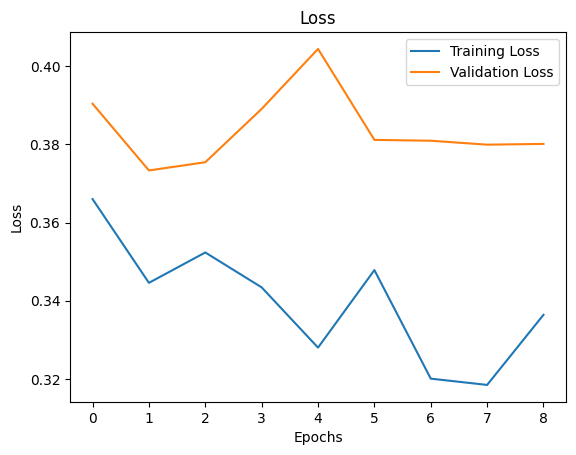

In [43]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

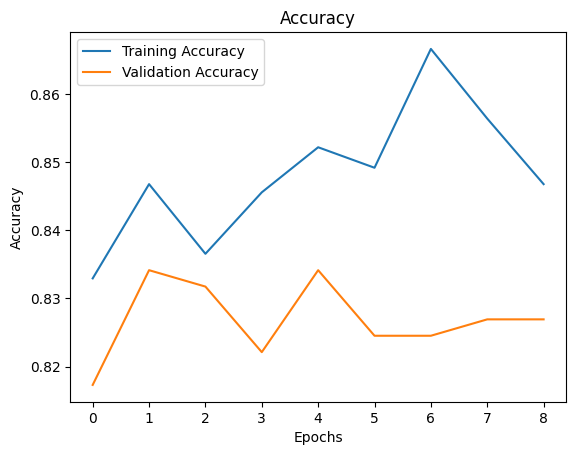

In [44]:
# Plot the precision curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# Evaluate model on train data
train_eval_results = model.evaluate(train_generator)
print(f'Accuracy: {train_eval_results[1]}')
print(f'Precision: {train_eval_results[2]}')
print(f'Recall: {train_eval_results[3]}')
precision = train_eval_results[2]
recall = train_eval_results[3]
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

52/52 [==============================] - 31s 590ms/step - loss: 0.3283 - accuracy: 0.8522 - precision: 0.8953 - recall: 0.8583
Accuracy: 0.8521634340286255
Precision: 0.895277202129364
Recall: 0.8582677245140076
F1-score: 0.8763819111856811


In [46]:
# Evaluate model on val data
val_eval_results = model.evaluate(val_generator)
print(f'Accuracy: {val_eval_results[1]}')
print(f'Precision: {val_eval_results[2]}')
print(f'Recall: {val_eval_results[3]}')
precision = val_eval_results[2]
recall = val_eval_results[3]

f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

13/13 [==============================] - 2s 159ms/step - loss: 0.3733 - accuracy: 0.8341 - precision: 0.8364 - recall: 0.9055
Accuracy: 0.8341346383094788
Precision: 0.8363636136054993
Recall: 0.9055117964744568
F1-score: 0.8695651983823809


In [47]:
# Evaluate model on test data
test_eval_results = model.evaluate(test_generator)
print(f'Accuracy: {test_eval_results[1]}')
precision = test_eval_results[2]
recall = test_eval_results[3]
print(f'Precision: {precision}')
print(f'Recall: {recall}')
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

10/10 [==============================] - 171s 19s/step - loss: 0.4875 - accuracy: 0.8000 - precision: 0.7419 - recall: 0.9200
Accuracy: 0.800000011920929
Precision: 0.7419354915618896
Recall: 0.9200000166893005
F1-score: 0.8214285827945081


10/10 [==============================] - 2s 222ms/step


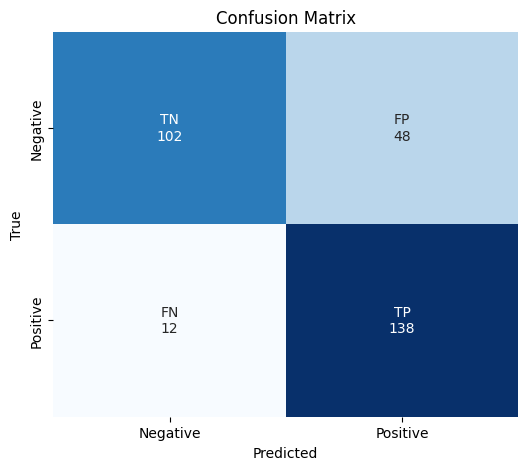

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediction on test set
predictions = model.predict(test_generator)
predictions = predictions.flatten()  # Convert predictions to 1D array if necessary

# Apply 0.5 threshold
predictions_binary = np.where(predictions > 0.5, 1, 0)

# True Labels
# Ensure test_generator labels are in the same order as predictions
true_labels = test_generator.classes

# Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions_binary)

# Extract individual elements
TN, FP, FN, TP = conf_matrix.ravel()

# Create a new confusion matrix with labels
conf_matrix_labelled = np.array([[f"TN\n{TN}", f"FP\n{FP}"], [f"FN\n{FN}", f"TP\n{TP}"]])

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
ax = sns.heatmap(conf_matrix, annot=conf_matrix_labelled, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
plt.show()
